In [131]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from __future__ import division
import requests

In [132]:
from io import StringIO

In [133]:
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"
source = requests.get(url).text
poll_data = StringIO(source)

In [134]:
poll_df = pd.read_csv(poll_data)
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [135]:
poll_df['Affiliation'].value_counts()

None     480
Dem       93
Rep        9
Other      4
Name: Affiliation, dtype: int64

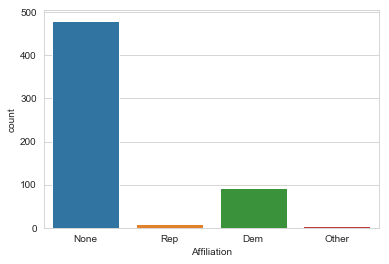

In [136]:
sns.countplot(poll_df['Affiliation']);

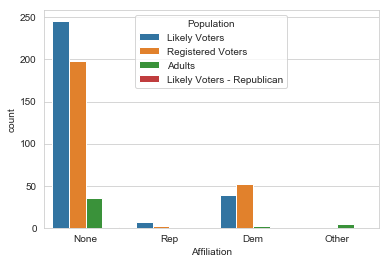

In [137]:
sns.countplot(poll_df['Affiliation'], hue=poll_df['Population']);

In [138]:
avg = pd.DataFrame(poll_df.mean())
avg = avg.drop('Number of Observations', axis=0)

In [139]:
std = pd.DataFrame(poll_df.std())
std = std.drop('Number of Observations', axis=0)

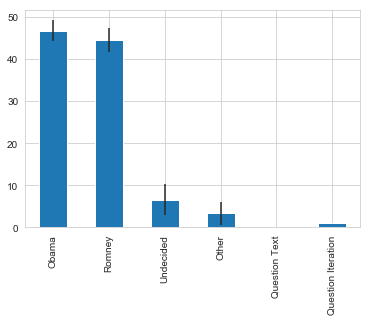

In [140]:
avg.plot(yerr=std, kind='bar', legend=False);

In [141]:
poll_avg = pd.concat([avg, std], axis=1)
poll_avg.columns = ['Average', 'Standard Deviation']

In [142]:
poll_avg.head()

,Average,Standard Deviation
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726
Question Text,NaN,NaN


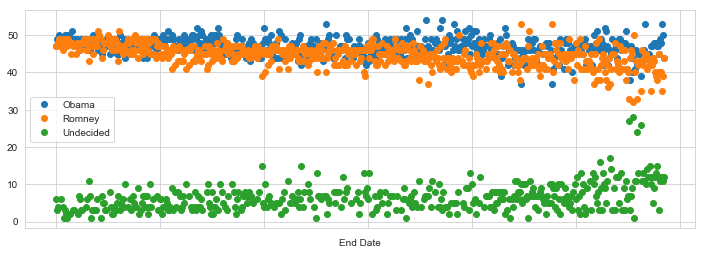

In [143]:
poll_df.plot(x='End Date', y=['Obama', 'Romney', 'Undecided'], linestyle='', marker='o', figsize=(12, 4));

In [144]:
from datetime import datetime

In [145]:
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney) / 100
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


In [146]:
poll_df = poll_df.groupby(['Start Date'], as_index=False).mean()

In [147]:
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


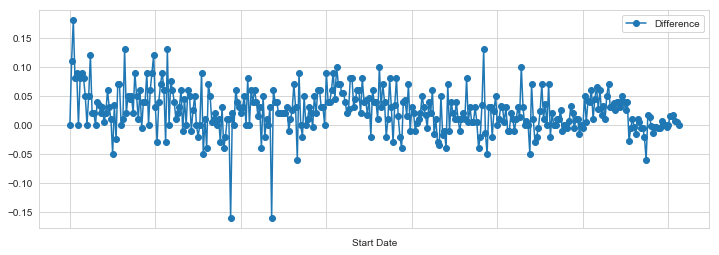

In [148]:
poll_df.plot('Start Date', 'Difference', figsize=(12, 4), marker='o', linestyle='-');

In [149]:
row_in = 0
xlimit = []

for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in += 1
        
print(min(xlimit))
print(max(xlimit))

325
352


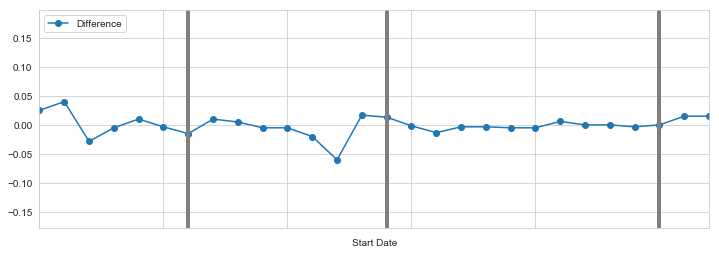

In [150]:
poll_df.plot('Start Date', 'Difference', figsize=(12, 4), marker='o', linestyle='-', xlim=(325, 352));
# oct 3
plt.axvline(x=329+2, linewidth=4, color='gray')
# oct 11
plt.axvline(x=329+10, linewidth=4, color='gray')
# oct 22
plt.axvline(x=329+21, linewidth=4, color='gray')

In [151]:
donor_df = pd.read_csv('Election_Donor_Data.csv')

/Users/sudeng/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [152]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [153]:
donor_df.shape

(1001731, 16)

In [154]:
donor_df['contb_receipt_amt'].value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

In [155]:
don_mean = donor_df['contb_receipt_amt'].mean()
don_std = donor_df['contb_receipt_amt'].std()

print('The average donation was %.2f with a std of %.2f'%(don_mean,don_std))

The average donation was 298.24 with a std of 3749.67


In [156]:
top_donor = donor_df['contb_receipt_amt'].copy()

In [157]:
top_donor = top_donor[top_donor > 0]

In [158]:
top_donor.sort_values(axis=0, ascending=False).head(10)

325136    2014490.51
326651    1944042.43
344539    1679114.65
344419    1511192.17
319478     526246.17
335187     512710.91
257270     451726.00
114754      33300.00
217891      25800.00
823345      25000.00
Name: contb_receipt_amt, dtype: float64

In [159]:
top_donor.value_counts().head()

100.0    178188
50.0     137584
25.0     110345
250.0     91182
500.0     57984
Name: contb_receipt_amt, dtype: int64

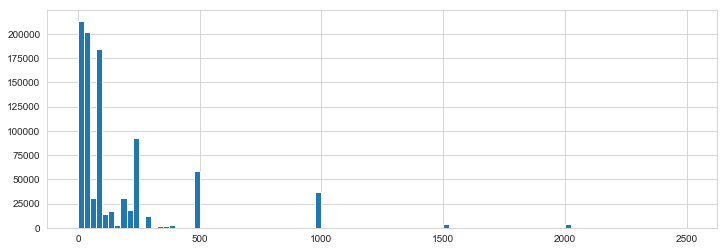

In [160]:
com_don = top_donor[top_donor < 2500]
com_don.hist(bins=100, figsize=(12, 4));

In [161]:
candidates = donor_df.cand_nm.unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [162]:
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}
donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [163]:
donor_df = donor_df[donor_df.contb_receipt_amt > 0]

In [164]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [165]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [166]:
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()
i = 0
for don in cand_amount:
    print(" The candidate %s raised %.0f dollars " %(cand_amount.index[i],don))
    print('\n')
    i += 1

 The candidate Bachmann, Michelle raised 2711439 dollars 


 The candidate Cain, Herman raised 7101082 dollars 


 The candidate Gingrich, Newt raised 12832770 dollars 


 The candidate Huntsman, Jon raised 3330373 dollars 


 The candidate Johnson, Gary Earl raised 566962 dollars 


 The candidate McCotter, Thaddeus G raised 39030 dollars 


 The candidate Obama, Barack raised 135877427 dollars 


 The candidate Paul, Ron raised 21009620 dollars 


 The candidate Pawlenty, Timothy raised 6004819 dollars 


 The candidate Perry, Rick raised 20305754 dollars 


 The candidate Roemer, Charles E. 'Buddy' III raised 373010 dollars 


 The candidate Romney, Mitt raised 88335908 dollars 


 The candidate Santorum, Rick raised 11043159 dollars 




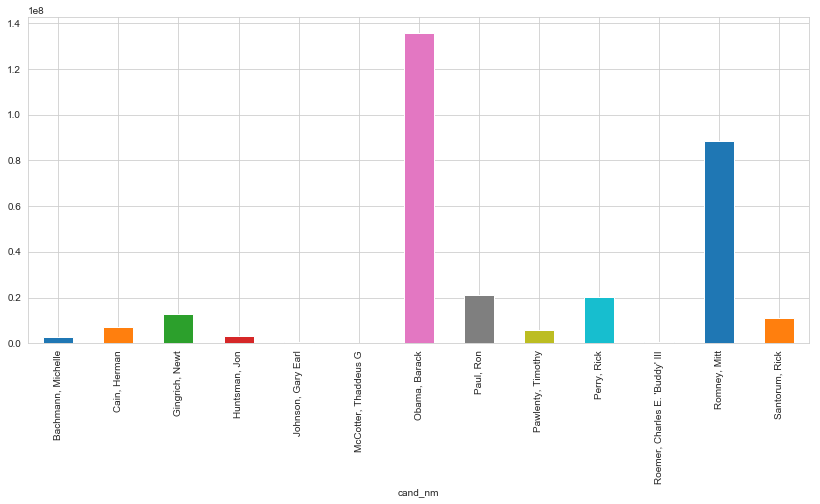

In [167]:
cand_amount.plot(kind='bar', figsize=(14, 6));

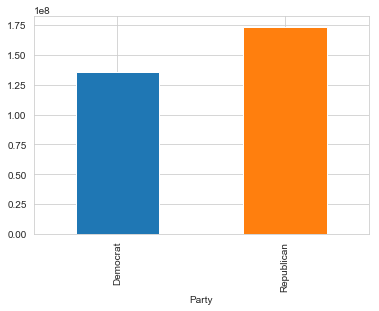

In [168]:
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar');

In [169]:
occupation_df = donor_df.pivot_table('contb_receipt_amt', index='contbr_occupation', columns='Party', aggfunc='sum')
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [170]:
occupation_df.shape

(45067, 2)

In [171]:
occupation_df = occupation_df[occupation_df.sum(1) > 500000]

In [172]:
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']

In [173]:
occupation_df = occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED', 'C.E.O.'],axis=0)

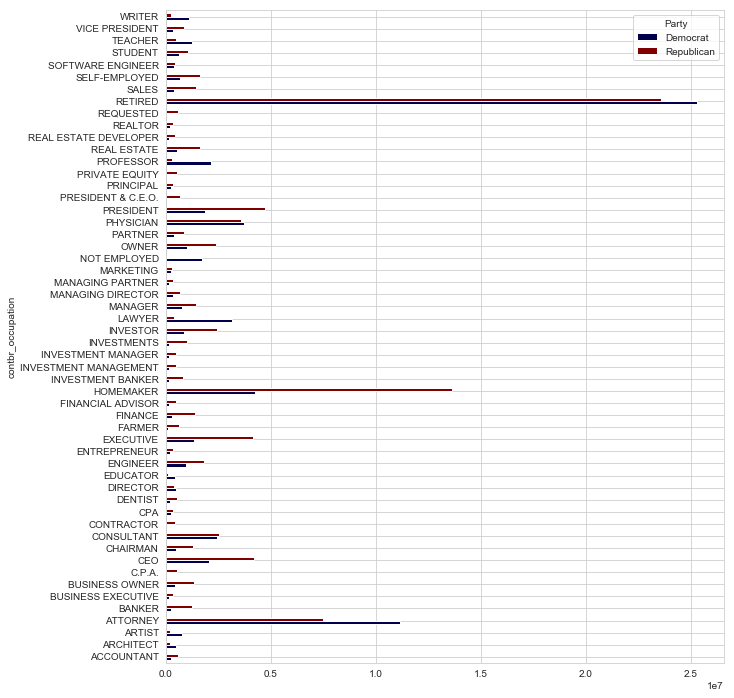

In [174]:
occupation_df.plot(kind='barh', figsize=(10, 12), cmap='seismic');

In [1]:
!!jupyter nbconvert *.ipynb

['[NbConvertApp] Converting notebook 2012 election data project.ipynb to html',
 '[NbConvertApp] Writing 593593 bytes to 2012 election data project.html']